In [59]:
import numpy as np

dm = [245.6, 245.6, 245.7, 246.1, 245.3, 245.5, 245.5, 245.2, 244.4, 245.6]
m = np.array([sum(dm[:n + 1]) for n in range(len(dm))]) / 1000
n_rise = np.array([
    [14.7, 17.5, 19.9, 22.3, 24.9, 27.3, 29.9, 32.3, 34.9, 35.3],
    [14.9, 17.6, 20.2, 22.7, 25.2, 26.8, 28.7, 32.3, 34.7, 37.0],
    [14.9, 17.6, 20.2, 22.7, 25.1, 27.5, 29.3, 31.4, 34.0, 35.6],
])
n_fall = np.array([
    [35.3, 33.3, 31.6, 29.9, 27.5, 25.2, 22.7, 20.2, 17.6, 14.9][::-1],
    [37.0, 34.5, 32.7, 29.9, 26.8, 25.2, 22.7, 20.2, 17.6, 14.9][::-1],
    [35.6, 34.5, 32.3, 30.0, 27.6, 25.3, 22.9, 20.4, 17.7, 14.8][::-1],
])
h = 1.435
r = 0.015

In [60]:
n_mean = np.array([np.array(a).mean() for a in zip(*np.concatenate((n_rise, n_fall)))])

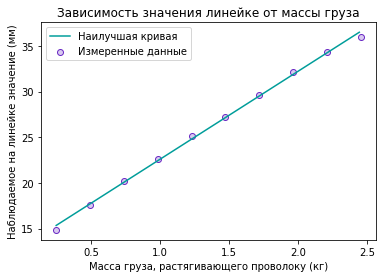

In [63]:
import matplotlib.pyplot as plt

colors = ['#6929c4', '#009d9a']

plt.scatter(m, n_mean, color=colors[0] + '40', edgecolors=colors[0], label='Измеренные данные')

k, b = np.polyfit(m, n_mean, 1)

x = np.arange(m.min(), m.max(), 0.01)
plt.plot(x, k * x + b, color=colors[1], label='Наилучшая кривая')

n_err = np.sqrt(sum((n_mean - (k * m + b)) ** 2) / len(n_mean - 1))

# plt.errorbar(m, n_mean, n_err, fmt='none', color=colors[0])

plt.xlabel('Масса груза, растягивающего проволоку (кг)')
plt.ylabel('Наблюдаемое на линейке значение (мм)')
plt.title('Зависимость значения линейке от массы груза')
plt.legend()

pass